In [1]:
# If libraries not installed (run once)
!pip install pandas numpy matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [5]:
# Load dataset
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")   # change filename if needed

# Display first rows
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
# Number of rows and columns
df.shape


(9994, 11)

In [7]:
# Column names
df.columns


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [8]:
# Column names
df.columns


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [9]:
# Statistical summary
df.describe()


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [10]:
df.isnull().sum()


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
df.fillna(method='ffill', inplace=True)


C:\Users\anith\AppData\Local\Temp\ipykernel_19224\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [13]:
df.drop_duplicates(inplace=True)


In [15]:
df.columns


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip()


In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [18]:
df['Order Date'].isnull().sum()


np.int64(5952)

In [19]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Year           4042 non-null   float64       
 12  Month          4042 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1015.1+ KB


In [21]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()


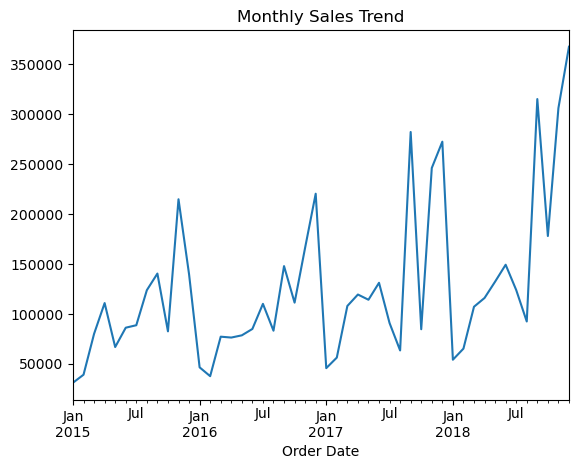

In [22]:
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


In [23]:
df['Sales'].sum()


np.int64(14956982)

In [24]:
df['Profit'].sum()


np.float64(3747121.1999999997)

In [25]:
df['Discount'].mean()


np.float64(0.22681709025415253)

In [26]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales


Region
West       4798743
East       4248368
Central    3468156
South      2440461
North         1254
Name: Sales, dtype: int64

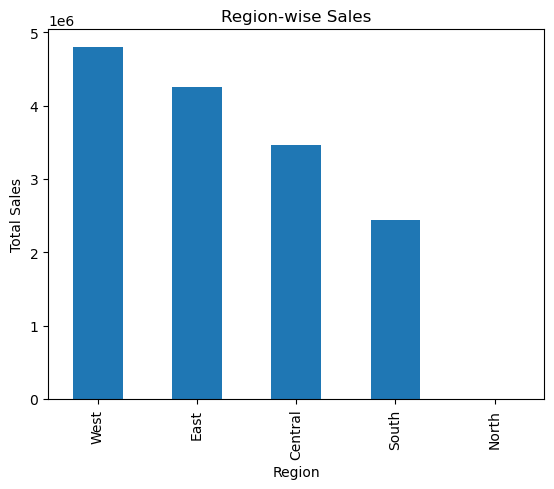

In [27]:
plt.figure()
region_sales.plot(kind='bar')
plt.title("Region-wise Sales")
plt.ylabel("Total Sales")
plt.show()


In [28]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
state_sales


State
Tamil Nadu    14956982
Name: Sales, dtype: int64

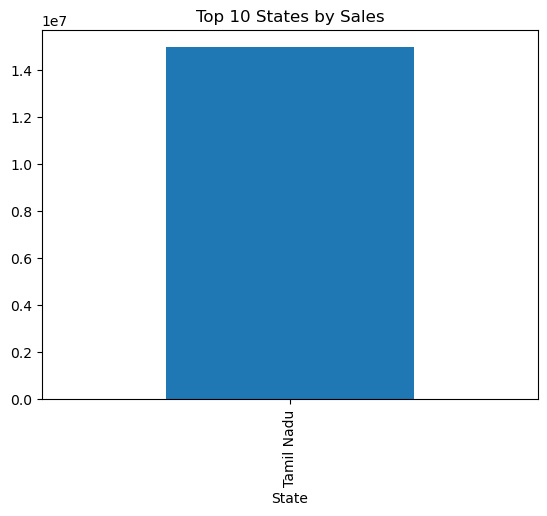

In [29]:
plt.figure()
state_sales.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.show()


In [30]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales


Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64

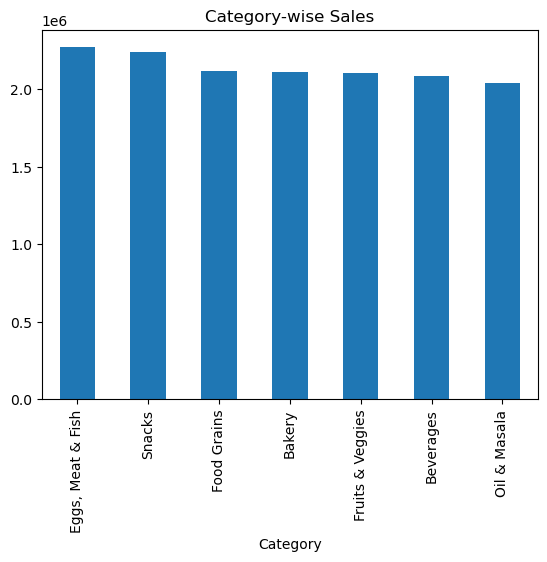

In [31]:
plt.figure()
category_sales.plot(kind='bar')
plt.title("Category-wise Sales")
plt.show()


In [32]:
subcat_sales = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
subcat_sales.head(10)


Sub Category
Health Drinks    1051439
Soft Drinks      1033874
Cookies           768213
Breads & Buns     742586
Noodles           735435
Chocolates        733898
Masalas           697480
Cakes             685612
Biscuits          684083
Spices            672876
Name: Sales, dtype: int64

In [33]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit


Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Food Grains          529162.64
Bakery               528521.06
Beverages            525605.76
Oil & Masala         497895.29
Name: Profit, dtype: float64

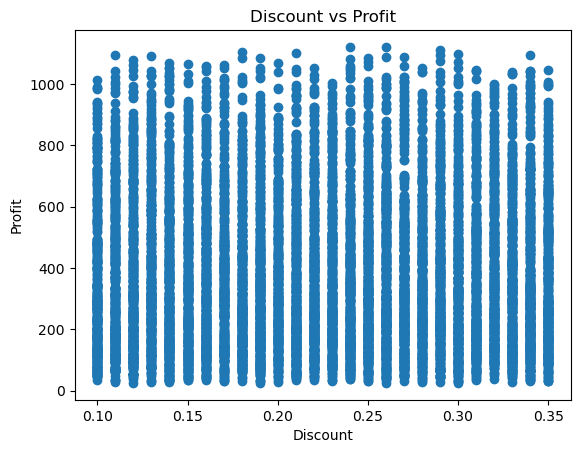

In [34]:
plt.figure()
plt.scatter(df['Discount'], df['Profit'])
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


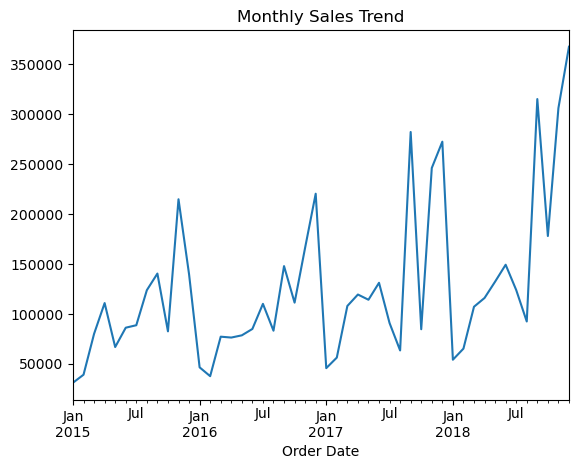

In [35]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


In [36]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers


Customer Name
Krithika    334361
Amrish      333351
Verma       331665
Arutra      325720
Vidya       321798
Vinne       319565
Shah        318588
Suresh      315973
Adavan      315341
Surya       312645
Name: Sales, dtype: int64

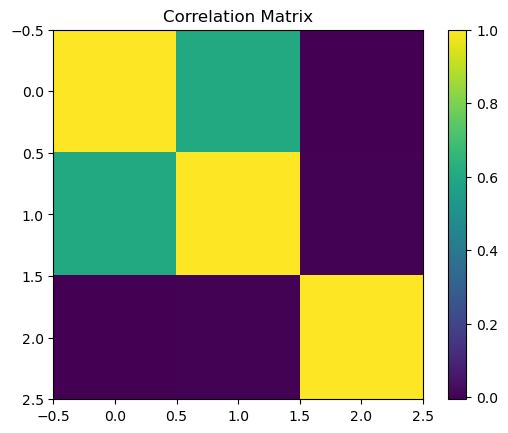

In [37]:
corr = df[['Sales','Profit','Discount']].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


📌 Key Insights

Example format:

1.West region generated highest sales.

2.Grocery category contributes majority of revenue.

3.High discounts negatively impact profit.

4.Sales peak during specific months.

5.Few customers contribute large revenue share.


📌 Recommendations

1.Focus marketing on high-performing regions.

2.Reduce heavy discounting to improve profit margins.

3.Promote high-profit subcategories.

4.Introduce loyalty programs for top customers.

5.Boost sales in low-performing states.